# Loading the data

The goal of this notebook is to get the song lyrics using Genius API and calculate a variety of metrics on them.
Their applicability will be determined later

In [202]:
import pandas as pd

df = pd.read_csv("sophisticationsSongs20240118.csv")

In [203]:
df.iloc[15:25,:]

,playlist_id,playlist_name,playlist_img,playlist_owner_name,playlist_owner_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.id,analysis_url,time_signature,added_at,is_local,primary_color,added_by.href,added_by.id,added_by.type,added_by.uri,added_by.external_urls.spotify,track.artists,track.disc_number,track.duration_ms,track.episode,track.explicit,track.href,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,track.album.album_type,track.album.artists,track.album.href,track.album.id,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.album.uri,track.album.external_urls.spotify,track.external_ids.isrc,track.external_urls.spotify,video_thumbnail.url,key_name,mode_name,key_mode
15,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.751,0.633,2.0,-5.818,0.0,0.0310,0.69900,0.000021,0.1060,0.913,135.042,5ocvSdRfpII0dBBIL1HCCq,https://api.spotify.com/v1/audio-analysis/5ocv...,4.0,2023-12-22T18:16:58Z,False,NaN,https://api.spotify.com/v1/users/x7avrckng58la...,x7avrckng58lal0b2f42bubw0,user,spotify:user:x7avrckng58lal0b2f42bubw0,https://open.spotify.com/user/x7avrckng58lal0b...,https://api.spotify.com/v1/artists/5cA6nGWK1TM...,1.0,188773.0,False,False,https://api.spotify.com/v1/tracks/5ocvSdRfpII0...,False,W Moim Ogródecku,54.0,https://p.scdn.co/mp3-preview/504d455e62a3c363...,True,1.0,track,spotify:track:5ocvSdRfpII0dBBIL1HCCq,album,https://api.spotify.com/v1/artists/5cA6nGWK1TM...,https://api.spotify.com/v1/albums/4Glau5jyMY38...,4Glau5jyMY38I0TRhD8O5B,W Moim Ogródecku,2011-09-01,day,9.0,album,spotify:album:4Glau5jyMY38I0TRhD8O5B,https://open.spotify.com/album/4Glau5jyMY38I0T...,PLN601600011,https://open.spotify.com/track/5ocvSdRfpII0dBB...,NaN,D,minor,D minor
16,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.722,0.450,4.0,-6.376,0.0,0.0308,0.70700,0.000000,0.3200,0.891,129.968,2AxJBmei8v5VmINbSY4w3m,https://api.spotify.com/v1/audio-analysis/2AxJ...,4.0,2023-12-22T18:17:00Z,False,NaN,https://api.spotify.com/v1/users/x7avrckng58la...,x7avrckng58lal0b2f42bubw0,user,spotify:user:x7avrckng58lal0b2f42bubw0,https://open.spotify.com/user/x7avrckng58lal0b...,https://api.spotify.com/v1/artists/5cA6nGWK1TM...,1.0,188893.0,False,False,https://api.spotify.com/v1/tracks/2AxJBmei8v5V...,False,Lipka,47.0,https://p.scdn.co/mp3-preview/0058a77d654eafc0...,True,6.0,track,spotify:track:2AxJBmei8v5VmINbSY4w3m,album,https://api.spotify.com/v1/artists/5cA6nGWK1TM...,https://api.spotify.com/v1/albums/4Glau5jyMY38...,4Glau5jyMY38I0TRhD8O5B,W Moim Ogródecku,2011-09-01,day,9.0,album,spotify:album:4Glau5jyMY38I0TRhD8O5B,https://open.spotify.com/album/4Glau5jyMY38I0T...,PLN601600016,https://open.spotify.com/track/2AxJBmei8v5VmIN...,NaN,E,minor,E minor
17,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.807,0.476,1.0,-7.313,1.0,0.0488,0.52700,0.000000,0.1550,0.864,116.955,1xtO3Kfjlcu2TuukVTIbpR,https://api.spotify.com/v1/audio-analysis/1xtO...,4.0,2023-12-22T18:17:25Z,False,NaN,https://api.spotify.com/v1/users/x7avrckng58la...,x7avrckng58lal0b2f42bubw0,user,spotify:user:x7avrckng58lal0b2f42bubw0,https://open.spotify.com/user/x7avrckng58lal0b...,https://api.spotify.com/v1/artists/5cA6nGWK1TM...,1.0,173846.0,False,False,https://api.spotify.com/v1/tracks/1xtO3Kfjlcu2...,False,Pastorałka od serca do ucha,46.0,https://p.scdn.co/mp3-preview/10f2c21a904d7e1e...,True,8.0,track,spotify:track:1xtO3Kfjlcu2TuukVTIbpR,album,https://api.spotify.com/v1/artists/5cA6nGWK1TM...,https://api.spotify.com/v1/albums/5CVxPZNMvlBf...,5CVxPZNMvlBfxmXMiNna1w,"Hej, kolęda!",2018-11-25,day,10.0,album,spotify:album:5CVxPZNMvlBfxmXMiNna1w,https://open.spotify.com/album/5CVxPZNMvlBfxmX...

# Getting the artists
Sometimes just the artist column is fine, but when there are multiple I have to take the first one.
This is not the most obvious transfer, but I already had the files for python so why bother with R

In [204]:
def getArtist(colval):
    try:
        if(colval[0]=='c'):
            return colval.split('c(')[3].split(',')[0].replace('"','')
        return colval.split(',')[2][1:]
    except:
        print(colval)

getArtist(df.loc[19,'track.artists'])

'Hugh Jackman'

In [205]:
#pd.set_option('display.max_columns', None)
df['Main_artist'] = df['track.artists'].apply(lambda x: getArtist(x))

nan


In [206]:
df[['track.name','Main_artist']]

,track.name,Main_artist
0,"Defying Gravity - From ""Wicked"" Original Broad...",Stephen Schwartz
1,Hung Up,Madonna
2,Jump,Madonna
3,Vogue,Madonna
4,Sorry,Madonna
...,...,...
1937,CORRUPTED AUTOMATA,AZALI
1938,Summar Al Layali - Ouska Remix,Ouska
1939,nyc in 1940,berlioz
1940,Falling In,Cabu


Cool overview: the most popular artists in the playlists

In [211]:
#pd.set_option("display.max_rows", 30)

df['Main_artist'].value_counts()

Main_artist
Taylor Swift            37
Tate McRae              36
Hozier                  30
PRO8L3M                 30
Jack Harlow             25
                        ..
MALARKEY                 1
Deep Chills              1
Portugal. The Man        1
Henry And The Waiter     1
Sunni Colón              1
Name: count, Length: 1025, dtype: int64

# Getting the lyrics

In [212]:
df['lyrics']=''

In [213]:
genius = lyricsgenius.Genius('LKpAw7r9qEhk--pjo2nIDmFWx5Hmhy3NUNIHNd3ruEETO7Nhbx8QUQLH6-ZX9Lt_')

for index, row in df.iterrows():
    # Extract song title and artist from DataFrame
    song_title = row['track.name']
    artist_name = row['Main_artist']

    try:
        # Search for the song on Genius
        song = genius.search_song(song_title, artist_name)

        # If the song is found, assign its lyrics to the 'lyrics' column
        if song is not None:
            df.at[index, 'lyrics'] = song.lyrics
        else:
            # Handle case where the song is not found on Genius
            df.at[index, 'lyrics'] = None

    except Exception as e:
        # Handle any exceptions that may occur during the process
        print(f"Error processing {song_title} by {artist_name}: {e}")

Searching for "Defying Gravity - From "Wicked" Original Broadway Cast Recording/2003" by Stephen Schwartz...
No results found for: 'Defying Gravity - From "Wicked" Original Broadway Cast Recording/2003 Stephen Schwartz'
Searching for "Hung Up" by Madonna...
Done.
Searching for "Jump" by Madonna...
Done.
Searching for "Vogue" by Madonna...
Done.
Searching for "Sorry" by Madonna...
Done.
Searching for "Like a Prayer" by Madonna...
Done.
Searching for "What A Feeling" by Irene Cara...
Done.
Searching for "Karma Chameleon - Remastered 2002" by Culture Club...
No results found for: 'Karma Chameleon - Remastered 2002 Culture Club'
Searching for "Uptown Girl" by Billy Joel...
Done.
Searching for "Take A Chance On Me" by ABBA...
Done.
Searching for "Freedom! '90 - Remastered" by George Michael...
Done.
Searching for "Tragedy" by Bee Gees...
Done.
Searching for "Xanadu" by Olivia Newton-John...
Done.
Searching for "Voulez-Vous" by ABBA...
Done.
Searching for "Gimme! Gimme! Gimme! (A Man After M

Done.
Searching for "Criminal" by Britney Spears...
Done.
Searching for "Kingdom Dance" by Alan Menken...
Specified song does not contain lyrics. Rejecting.
Searching for "La La La (Brazil 2014) (feat. Carlinhos Brown)" by Shakira...
Done.
Searching for "ZITTI E BUONI" by Måneskin...
Done.
Searching for "Stargirl Interlude" by The Weeknd...
Done.
Searching for "The One That Got Away" by Katy Perry...
Done.
Searching for "Giulia" by Gianni Togni...
Done.
Searching for "W Stronę Słońca" by Ewelina Lisowska...
Done.
Searching for "Penelope" by KUZKO...
Done.
Searching for "It's On - Soundtrack" by N.L.T....
Done.
Searching for "Levitating" by Dua Lipa...
Done.
Searching for "Levitating" by Dua Lipa...
Done.
Searching for "L'altra dimensione" by Måneskin...
Done.
Searching for "My Mama Says" by KUZKO...
Done.
Searching for "Unchained Melody - Film Mix" by Elvis Presley...
No results found for: 'Unchained Melody - Film Mix Elvis Presley'
Searching for "I Was There" by The War On Drugs...
Do

Done.
Searching for "RENEGADE" by VALORANT...
Done.
Searching for "Sonne" by Rammstein...
Done.
Searching for "Sonne" by Rammstein...
Done.
Searching for "Sonne" by Rammstein...
Done.
Searching for "Fly Me To The Moon" by Astrud Gilberto...
Done.
Searching for "Dichotomy (Intro)" by GG Magree...
Done.
Searching for "Ces petits riens" by Stacey Kent...
Done.
Searching for "BELLA STORIA" by Fedez...
Done.
Searching for "Manhã de Carnaval" by Astrud Gilberto...
Done.
Searching for "Cose che non vuoi sentirti dire" by Nayt...
Done.
Searching for "Faccia Di Velluto" by Daniele Silvestri...
Done.
Searching for "Brutus" by The Buttress...
Done.
Searching for "WALLAH" by Ghali...
Done.
Searching for "IN THE RING" by VALORANT...
Done.
Searching for "Tattica" by Fulminacci...
Done.
Searching for "PARTIRE DA TE" by Rkomi...
Done.
Searching for "Lumen" by Matteo Tura...
Done.
Searching for "KLK" by Arca...
Done.
Searching for "El Alma Que Te Trajo" by Safety Trance...
Done.
Searching for "Jungle -

Done.
Searching for "Stay" by Zedd...
Done.
Searching for "Call It Love" by Felix Jaehn...
Done.
Searching for "The Ballet Girl" by Aden Foyer...
Done.
Searching for "Telescoop" by Tom Helsen...
Done.
Searching for "People Help the People" by Birdy...
Done.
Searching for "Happy Now" by Kygo...
Done.
Searching for "Horizon" by BLØF...
Done.
Searching for "Born With It" by Enzo Ingrosso...
Done.
Searching for "TRUSTFALL" by P!nk...
Done.
Searching for "Rara Vez" by Taiu...
Done.
Searching for "Rara Vez" by Taiu...
Done.
Searching for "Nicki Nicole: Bzrp Music Sessions, Vol. 13" by Bizarrap...
Done.
Searching for "Babydoll" by Dominic Fike...
Done.
Searching for "Babydoll" by Dominic Fike...
Done.
Searching for "Babydoll" by Dominic Fike...
Done.
Searching for "Destri" by Gazzelle...
Done.
Searching for "Stanza Singola (feat. Tommaso Paradiso)" by Franco126...
Done.
Searching for "Why'd You Only Call Me When You're High?" by Arctic Monkeys...
Done.
Searching for "Why'd You Only Call Me Wh

Done.
Searching for "L'aventurier" by Indochine...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "Mädchen auf dem Pferd" by Luca-Dante Spadafora...
Done.
Searching for "This Girl (Kungs Vs. Cookin' On 3 Burners)" by Kungs...
Done.
Searching for "The Less I Know The Better" by Tame Impala...
Done.
Searching for "Houdini" by Dua Lipa...
Done.
Searching for "Houdini" by Dua Lipa...
Done.
Searching for "Dans l'univers" by Nekfeu...
Done.
Searching for "Everybody Wants To Rule The World" by Tears For Fears...
Done.
Searching for "Everybody Wants To Rule The World" by Tears For Fears...
Done.
Searching for "Murder On The Dancefloor" by Sophie Ellis-Bextor...
Done.
Searching for "Murder On The Dancefloor" by Sophie Ellis-Bextor...
Done.
Searching for "Murder On The Dancefloor" by Sophie Ellis-Bextor...
Done.
Searching for "Black Out Days" by Phantogram...
Done.
Search

Done.
Searching for "Cake" by Melanie Martinez...
Done.
Searching for "Call You" by lucidbeatz...
Done.
Searching for "None Of My Business" by Tinashe...
Done.
Searching for "Secrete" by Oscar...
Done.
Searching for "Backseat" by Daniel Di Angelo...
Done.
Searching for "Lumea asta" by Ian...
Done.
Searching for "Lunchbox Friends" by Melanie Martinez...
Done.
Searching for "stfu" by Calinacho...
Done.
Searching for "Toxic" by Oscar...
Done.
Searching for "greedy" by Tate McRae...
Done.
Searching for "greedy" by Tate McRae...
Done.
Searching for "greedy" by Tate McRae...
Done.
Searching for "greedy" by Tate McRae...
Done.
Searching for "greedy" by Tate McRae...
Done.
Searching for "greedy" by Tate McRae...
Done.
Searching for "Sprinter" by Dave...
Done.
Searching for "Sprinter" by Dave...
Done.
Searching for "wRoNg (feat. Kehlani)" by ZAYN...
Done.
Searching for "Droguri Sau Vise II" by Oscar...
Done.
Searching for "You Get Me So High" by The Neighbourhood...
Done.
Searching for "CLEOPAT

Done.
Searching for "I Ciebie też, bardzo (feat. Daria Zawiałow, Dawid Podsiadło & Vito Bambino)" by Męskie Granie Orkiestra...
Done.
Searching for "Love On The Brain" by Rihanna...
Done.
Searching for "Love On The Brain" by Rihanna...
Done.
Searching for "Love On The Brain" by Rihanna...
Done.
Searching for "The Time Is Now" by Moloko...
Done.
Searching for "La lune" by L'Impératrice...
Done.
Searching for "Unchained Melody" by The Righteous Brothers...
Done.
Searching for "Supreme" by Robbie Williams...
Done.
Searching for "You've Got The Love" by Florence + The Machine...
Done.
Searching for "Comment te dire adieu - Remasterisé en 2016" by Françoise Hardy...
No results found for: 'Comment te dire adieu - Remasterisé en 2016 Françoise Hardy'
Searching for "It Must Have Been Love - From the Film "Pretty Woman"" by Roxette...
No results found for: 'It Must Have Been Love - From the Film "Pretty Woman" Roxette'
Searching for "Bad Romance" by Lady Gaga...
Done.
Searching for "Torn" by Na

Done.
Searching for "(Don't Fear) The Reaper" by Blue Öyster Cult...
Done.
Searching for "Karma" by Taylor Swift...
Done.
Searching for "Karma" by Taylor Swift...
Done.
Searching for "Karma" by Taylor Swift...
Done.
Searching for "Sweet Child O' Mine" by Guns N' Roses...
Done.
Searching for "Fairytale of New York (feat. Kirsty MacColl)" by The Pogues...
Done.
Searching for "Would That I" by Hozier...
Done.
Searching for "All You Had To Do Was Stay (Taylor's Version)" by Taylor Swift...
Done.
Searching for "I'm On Fire" by Bruce Springsteen...
Done.
Searching for "robert’s place - voice memo" by simon robert french...
Done.
Searching for "Sleep On The Floor" by The Lumineers...
Done.
Searching for "willow" by Taylor Swift...
Done.
Searching for "The Ecstasy Of Gold - Live" by Metallica...
Done.
Searching for "Hotel California - 2013 Remaster" by Eagles...
Done.
Searching for "Feather" by Sabrina Carpenter...
Done.
Searching for "Getaway Car" by Taylor Swift...
Done.
Searching for "Super

Done.
Searching for "Rich Kids" by Aiyana-Lee...
Done.
Searching for "III. Urn" by Childish Gambino...
Done.
Searching for "MASCULINITY" by LUCKY LOVE...
Done.
Searching for "Charge It" by ENNY...
Done.
Searching for "Hello" by Adele...
Done.
Searching for "If Ever" by Fana Hues...
Done.
Searching for "CORALINE" by Måneskin...
Done.
Searching for "Love On The Brain" by Rihanna...
Done.
Searching for "Love On The Brain" by Rihanna...
Done.
Searching for "Love On The Brain" by Rihanna...
Done.
Searching for "Obseben" by Stenli...
Done.
Searching for "That's Life - 2008 Remastered" by Frank Sinatra...
No results found for: 'That's Life - 2008 Remastered Frank Sinatra'
Searching for "VENT'ANNI" by Måneskin...
Done.
Searching for "Otgore" by Jluch...
Done.
Searching for "Sonne" by Rammstein...
Done.
Searching for "Sonne" by Rammstein...
Done.
Searching for "Sonne" by Rammstein...
Done.
Searching for "Shokolad" by Ostava...
Done.
Searching for "Torna a casa" by Måneskin...
Done.
Searching fo

Done.
Searching for "Dial Drunk (with Post Malone)" by Noah Kahan...
Done.
Searching for "Touch (feat. Paul Williams)" by Daft Punk...
Done.
Searching for "Disco" by Surf Curse...
Done.
Searching for "Wicked Game" by Widowspeak...
Done.
Searching for "Nancy From Now On" by Father John Misty...
Done.
Searching for "Instant Crush (feat. Julian Casablancas)" by Daft Punk...
Done.
Searching for "In My Life - Remastered 2009" by The Beatles...
Done.
Searching for "Big Sis" by SALES...
Done.
Searching for "Whistle For The Choir" by The Fratellis...
Done.
Searching for "Get Lucky (feat. Pharrell Williams and Nile Rodgers)" by Daft Punk...
Done.
Searching for "Archie, Marry Me" by Alvvays...
Done.
Searching for "Wide Open" by The Chemical Brothers...
Done.
Searching for "Petals" by TOPS...
Done.
Searching for "Beyond" by Daft Punk...
Done.
Searching for "Lightenup" by Parcels...
Done.
Searching for "Catch The Breeze - Peel Session" by Slowdive...
Done.
Searching for "Why Do You Let Me Stay Her

Done.
Searching for "Sao Ban Pok Pab" by Panom Nopporn...
No results found for: 'Sao Ban Pok Pab Panom Nopporn'
Searching for "Lam Plearn Chern Bump" by Somjai Nilbarun...
No results found for: 'Lam Plearn Chern Bump Somjai Nilbarun'
Searching for "Oh Rumah" by Eri...
Done.
Searching for "Las Sospechas (Night Theme)" by Los Sospechos...
Done.
Searching for "Resistance" by The Sound...
Done.
Searching for "Transona Five" by Stereolab...
Done.
Searching for "Sporting Life - Taken From The Final Day Single" by Young Marble Giants...
Done.
Searching for "Hyu Dororo" by Tō Yō...
Done.
Searching for "Flavor Bud Living - 2006 Digital Remaster" by Captain Beefheart & His Magic Band...
No results found for: 'Flavor Bud Living - 2006 Digital Remaster Captain Beefheart & His Magic Band'
Searching for "Gulp a Sonata" by Amon Düül II...
Specified song does not contain lyrics. Rejecting.
Searching for "Another the Letter - 2006 Remastered Version" by Wire...
Done.
Searching for "Li Ma Li" by Tō Yō..

Done.
Searching for "La bohème" by Charles Aznavour...
Done.
Searching for "GODS" by League of Legends...
Done.
Searching for "Strange Traps" by Stupeflip...
Done.
Searching for "Amour plastique" by Videoclub...
Done.
Searching for "Mes emmerdes - Remastered 2014" by Charles Aznavour...
Done.
Searching for "Alright" by Supergrass...
Done.
Searching for "1993" by Stupeflip...
Done.
Searching for "Le déserteur" by Boris Vian...
Done.
Searching for "Mardy Bum" by Arctic Monkeys...
Done.
Searching for "Evil" by Interpol...
Done.
Searching for "Nan ?... Si ?" by Stupeflip...
Done.
Searching for "Mai" by Videoclub...
Done.
Searching for "Complainte Du Progrès" by Boris Vian...
Done.
Searching for "Can't Stop" by Red Hot Chili Peppers...
Done.
Searching for "Hier encore" by Charles Aznavour...
Done.
Searching for "Pompeii" by Bastille...
Done.
Searching for "Enemy (with JID) - from the series Arcane League of Legends" by Imagine Dragons...
Done.
Searching for "Razorblade" by The Strokes...
Do

Done.
Searching for "How Deep Is Your Love?" by The Rapture...
Done.
Searching for "What Do They Know?" by Mindless Self Indulgence...
Done.
Searching for "Kiss Off" by Violent Femmes...
Done.
Searching for "Life Of Hope" by Leo Mano...
Done.
Searching for "I Need Your Love" by The Rapture...
Done.
Searching for "Get It Up" by Mindless Self Indulgence...
Done.
Searching for "Add It Up" by Violent Femmes...
Done.
Searching for "באב אל ואד 38/א´" by Habiluim...
Done.
Searching for "Sister Saviour - DFA vocal remix" by The Rapture...
No results found for: 'Sister Saviour - DFA vocal remix The Rapture'
Searching for "Faggot" by Mindless Self Indulgence...
Done.
Searching for "Maneater" by Daryl Hall & John Oates...
Done.
Searching for "Rock the Casbah - Remastered" by The Clash...
Done.
Searching for "Lazarus" by David Bowie...
Done.
Searching for "Never Wanted To Dance" by Mindless Self Indulgence...
Done.
Searching for "Machu Picchu" by The Strokes...
Done.
Searching for "Machu Picchu" b

Done.
Searching for "Pirelli" by PRO8L3M...
Done.
Searching for "Feel the Rush Tonight" by Lazerhawk...
Done.
Searching for "1 + 2" by Jetlagz...
Done.
Searching for "Star Eater" by Daniel Deluxe...
Specified song does not contain lyrics. Rejecting.
Searching for "To nie był film" by PRO8L3M...
Done.
Searching for "Knightriders" by Fury Weekend...
Specified song does not contain lyrics. Rejecting.
Searching for "Szum" by Jetlagz...
Done.
Searching for "Ich weiß es nicht" by Lindemann...
Done.
Searching for "Widmo" by PRO8L3M...
Done.
Searching for "Menschenfresser" by Eisbrecher...
Done.
Searching for "Mieć i nie mieć" by Jetlagz...
Done.
Searching for "Frau & Mann" by Lindemann...
Done.
Searching for "Go Bananas" by Little Big...
Done.
Searching for "Élan" by Nightwish...
Done.
Searching for "Alarm" by Jetlagz...
Done.
Searching for "I'm Not Afraid" by Emigrate...
Done.
Searching for "Understand" by Combichrist...
Done.
Searching for "The Curse (The Toxic Avenger Remix)" by Magic Swor

No results found for: 'Puthiyoru Lokam Hesham Abdul Wahab'
Searching for "Tum Mile" by Pritam...
Done.
Searching for "Jaise Mera Tu" by Sachin-Jigar...
No results found for: 'Jaise Mera Tu Sachin-Jigar'
Searching for "Iktara" by Amit Trivedi...
Done.
Searching for "Darshana" by Hesham Abdul Wahab...
No results found for: 'Darshana Hesham Abdul Wahab'
Searching for "On My Mama" by Victoria Monét...
Done.
Searching for "Samjho Na" by Aditya Rikhari...
Done.
Searching for "The Way I Are" by Timbaland...
Done.
Searching for "Hridayame (From "Hi Nanna")" by Anurag Kulkarni...
No results found for: 'Hridayame (From "Hi Nanna") Anurag Kulkarni'
Searching for "Chaleya (From "Jawan")" by Anirudh Ravichander...
Done.
Searching for "Lovin On Me" by Jack Harlow...
Done.
Searching for "Lovin On Me" by Jack Harlow...
Done.
Searching for "Lovin On Me" by Jack Harlow...
Done.
Searching for "Lovin On Me" by Jack Harlow...
Done.
Searching for "Lovin On Me" by Jack Harlow...
Done.
Searching for "Press Me

Done.
Searching for "Nobody knows" by Square Perception...
Done.
Searching for "CORRUPTED AUTOMATA" by AZALI...
Done.
Searching for "Summar Al Layali - Ouska Remix" by Ouska...
Done.
Searching for "nyc in 1940" by berlioz...
Done.
Searching for "Falling In" by Cabu...
Specified song does not contain lyrics. Rejecting.
Searching for "Supernova" by Sunni Colón...
Done.


In [214]:
df.to_csv('songlyricsoutput20240118.csv')

In [215]:
df.shape

(1942, 60)

# Cleaning the lyrics

In [219]:
print(df.loc[100,'lyrics'])


I'm hot, you're cold
You go around like you know
Who I am, but you don't
You've got me on my toes


I'm slipping into the lava
And I'm trying to keep from going under
Baby, who turned the temperature hotter?
'Cause I'm burnin' up, burnin' up for you, baby
Come on, girl


I fell (I fell) so fast (So fast)
Can't hold myself back
High heels (High heels), red dress (Red dress)
All by yourself, gotta catch my breath


I'm slipping into the lava
And I'm trying to keep from going under
Baby, who turned the temperature hotter?
'Cause I'm burnin' up, burnin' up for you, baby


Walk in the room, all I can see is you, oh
Staring me down, I know you feel it, too
You might also like
I'm slipping into the lava
And I'm trying to keep from going under
Baby, who turned the temperature hotter?
'Cause I'm burnin' up, burnin' up for you, baby
Slipping into the lava
And I'm trying to keep from going under
Baby, who turned the temperature hotter?
'Cause I'm burnin' up, burnin' up for you, baby


Yo, we're 

In [217]:
#removing the contributors
def clean_lyrics(lyrics):
    if lyrics is None:
        return None
    
    # Find the index of the word "Lyrics" in the lyrics string
    
    index = lyrics.find("Lyrics") + 6

    # If "Lyrics" is found, return the substring starting from that index
    # Otherwise, return the original lyrics
    return lyrics[index:] if index != -1 else lyrics
df['lyrics'] = df['lyrics'].apply(clean_lyrics)

In [218]:
#Removing the verse info
import re
def remove_square_brackets(text):
    if text is None:
        return None
    return re.sub(r'\[.*?\]', '', text)

df['lyrics'] = df['lyrics'].apply(remove_square_brackets)

In [220]:
df=df.drop_duplicates()

# Checking the language

In [221]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
    
df['language'] = df['lyrics'].apply(detect_language)

In [222]:
df['language'].value_counts()

language
en         993
unknown    250
pl         126
ja          71
de          45
          ... 
da           1
vi           1
uk           1
ar           1
tr           1
Name: count, Length: 32, dtype: int64

array([[<Axes: title={'center': 'count'}>]], dtype=object)

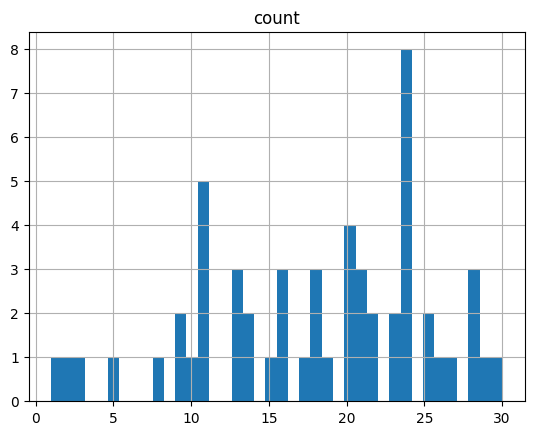

In [223]:
import matplotlib.pyplot as plt

# Group by 'playlist_id' and count the number of rows for each group
playlist_counts = df[df['language']=='en'].groupby('playlist_id').size().reset_index(name='count')

pd.set_option('display.max_rows', 60)
playlist_counts.hist(bins=40)

# Calculating the stats

In [224]:
import textstat
import pandas as pd

def calculate_textstat_metrics(df, text_column):
    # Create a copy of the DataFrame to avoid modifying the original
    df_result = df.copy()

    # Check for None values in the specified text column
    null_mask = df_result[text_column].isnull()

    # Apply textstat metrics only to non-None values
    df_result.loc[~null_mask, 'flesch_reading_ease'] = df_result.loc[~null_mask, text_column].apply(textstat.flesch_reading_ease)
    df_result.loc[~null_mask, 'flesch_kincaid_grade'] = df_result.loc[~null_mask, text_column].apply(textstat.flesch_kincaid_grade)
    df_result.loc[~null_mask, 'gunning_fog'] = df_result.loc[~null_mask, text_column].apply(textstat.gunning_fog)
    df_result.loc[~null_mask, 'smog_index'] = df_result.loc[~null_mask, text_column].apply(textstat.smog_index)
    df_result.loc[~null_mask, 'automated_readability_index'] = df_result.loc[~null_mask, text_column].apply(textstat.automated_readability_index)
    df_result.loc[~null_mask, 'coleman_liau_index'] = df_result.loc[~null_mask, text_column].apply(textstat.coleman_liau_index)
    df_result.loc[~null_mask, 'linsear_write_formula'] = df_result.loc[~null_mask, text_column].apply(textstat.linsear_write_formula)
    df_result.loc[~null_mask, 'dale_chall_readability_score'] = df_result.loc[~null_mask, text_column].apply(textstat.dale_chall_readability_score)
    df_result.loc[~null_mask, 'text_standard'] = df_result.loc[~null_mask, text_column].apply(textstat.text_standard)
    df_result.loc[~null_mask, 'mcalpine_eflaw'] = df_result.loc[~null_mask, text_column].apply(textstat.mcalpine_eflaw)
    df_result.loc[~null_mask, 'syllable_count'] = df_result.loc[~null_mask, text_column].apply(textstat.syllable_count)
    df_result.loc[~null_mask, 'lexicon_count'] = df_result.loc[~null_mask, text_column].apply(lambda x: textstat.lexicon_count(x, removepunct=True))
    df_result.loc[~null_mask, 'difficult_words'] = df_result.loc[~null_mask, text_column].apply(textstat.difficult_words)
    df_result.loc[~null_mask, 'polysyllabcount'] = df_result.loc[~null_mask, text_column].apply(textstat.polysyllabcount)
    df_result.loc[~null_mask, 'monosyllabcount'] = df_result.loc[~null_mask, text_column].apply(textstat.monosyllabcount)
    
    df_result.loc[~null_mask, 'difficult_words_perc'] = df_result.loc[~null_mask, 'difficult_words'] / df_result.loc[~null_mask, 'lexicon_count']
    df_result.loc[~null_mask, 'polysyllab_perc'] = df_result.loc[~null_mask, 'polysyllabcount'] / df_result.loc[~null_mask, 'lexicon_count']
    df_result.loc[~null_mask, 'monosyllab_perc'] = df_result.loc[~null_mask, 'monosyllabcount'] / df_result.loc[~null_mask, 'lexicon_count']
    df_result.loc[~null_mask, 'syllable_perc'] = df_result.loc[~null_mask, 'syllable_count'] / df_result.loc[~null_mask, 'lexicon_count']

    # For rows where the 'lyrics' column is None, set all metrics to None
    df_result.loc[null_mask, 'flesch_reading_ease':'monosyllabcount'] = None

    return df_result

    return df

df_test = calculate_textstat_metrics(df, 'lyrics')

In [225]:
test = df_test.loc[1,'lyrics']

<Axes: >

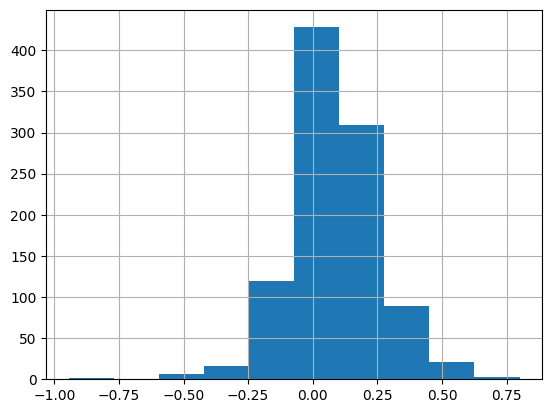

In [229]:
df_test[df_test['language']=='en']['sentiment'].hist()

## sentiment

In [227]:
from textblob import TextBlob

def get_sentiment(text):
    if text is not None:
        # Check if the text is in English
        blob = TextBlob(text)
        #if blob.detect_language() != 'en':
            # Translate non-English text to English
            #blob = blob.translate(to='en')
        
        # Perform sentiment analysis
        analysis = blob.sentiment
        return analysis.polarity
    else:
        return None
    
df_test['sentiment'] = df_test['lyrics'].apply(get_sentiment)

In [228]:
df_test

,playlist_id,playlist_name,playlist_img,playlist_owner_name,playlist_owner_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.id,analysis_url,time_signature,added_at,is_local,primary_color,added_by.href,added_by.id,added_by.type,added_by.uri,added_by.external_urls.spotify,track.artists,track.disc_number,track.duration_ms,track.episode,track.explicit,track.href,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,track.album.album_type,track.album.artists,track.album.href,track.album.id,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.album.uri,track.album.external_urls.spotify,track.external_ids.isrc,track.external_urls.spotify,video_thumbnail.url,key_name,mode_name,key_mode,Main_artist,lyrics,language,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,text_standard,mcalpine_eflaw,syllable_count,lexicon_count,difficult_words,polysyllabcount,monosyllabcount,difficult_words_perc,polysyllab_perc,monosyllab_perc,syllable_perc,sentiment
0,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.333,0.377,6.0,-8.282,1.0,0.0343,0.72200,0.000000,0.0333,0.2450,87.613,0yM3VmM8gHEVGViKvAbQkc,https://api.spotify.com/v1/audio-analysis/0yM3...,4.0,2023-12-22T18:10:45Z,False,NaN,https://api.spotify.com/v1/users/x7avrckng58la...,x7avrckng58lal0b2f42bubw0,user,spotify:user:x7avrckng58lal0b2f42bubw0,https://open.spotify.com/user/x7avrckng58lal0b...,"c(""https://api.spotify.com/v1/artists/7daPb40K...",1.0,353920.0,False,False,https://api.spotify.com/v1/tracks/0yM3VmM8gHEV...,False,"Defying Gravity - From ""Wicked"" Original Broad...",54.0,NaN,True,11.0,track,spotify:track:0yM3VmM8gHEVGViKvAbQkc,compilation,"c(""https://api.spotify.com/v1/artists/7daPb40K...",https://api.spotify.com/v1/albums/46VuziW5kL9H...,46VuziW5kL9Hrt5NlJtLjY,Wicked,2004-01-01,day,19.0,album,spotify:album:46VuziW5kL9Hrt5NlJtLjY,https://open.spotify.com/album/46VuziW5kL9Hrt5...,USUMC0300219,https://open.spotify.com/track/0yM3VmM8gHEVGVi...,NaN,F#,major,F# major,Stephen Schwartz,None,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.640,0.646,9.0,-7.572,0.0,0.0497,0.00364,0.165000,0.0912,0.4150,124.992,70VjMtwhm3Q2HBQeJnPfmh,https://api.spotify.com/v1/audio-analysis/70Vj...,4.0,2023-12-22T18:10:51Z,False,NaN,https://api.spotify.com/v1/users/x7avrckng58la...,x7avrckng58lal0b2f42bubw0,user,spotify:user:x7avrckng58lal0b2f42bubw0,https://open.spotify.com/user/x7avrckng58lal0b...,https://api.spotify.com/v1/artists/6tbjWDEIzxo...,1.0,336880.0,False,False,https://api.spotify.com/v1/tracks/70VjMtwhm3Q2...,False,Hung Up,54.0,https://p.scdn.co/mp3-preview/d67599af5ed261f7...,True,1.0,track,spotify:track:70VjMtwhm3Q2HBQeJnPfmh,compilation,https://api.spotify.com/v1/artists/6tbjWDEIzxo...,https://api.spotify.com/v1/albums/43lok9zd7BW5...,43lok9zd7BW5CoYkXZs7S0,Celebration (double disc version),2009-09-18,day,37.0,album,spotify:album:43lok9zd7BW5CoYkXZs7S0,https://open.spotify.com/album/43lok9zd7BW5CoY...,USWB10903598,https://open.spotify.com/track/70VjMtwhm3Q2HBQ...,NaN,A,minor,A minor,Madonna,\nTime goes by so slowly\nTime goes by so slow...,en,-395.09,190.8,197.36,0.0,242.7,4.73,51.000000,24.81,190th and 191st grade,758.0,580.0,493.0,6.0,2.0,409.0,0.012170,0.004057,0.829615,1.176471,-0.273958
2,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.629,0.839,9.0,-7.061,1.0,0.0899,0.00180,0.085900,0.2510,0.4490,118.979,5hmRhU6fWzH0NjYmfhHjhp,https://api.spotify.com/v1/audio-analysis/5hmR...,4.0,2023

In [232]:
df_test.to_csv('song_data_20240118.csv')

In [231]:
df_ooo = pd.read_csv('song_data_20240118_2.csv')
df_ooo

,Unnamed: 0,playlist_id,playlist_name,playlist_img,playlist_owner_name,playlist_owner_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track.id,analysis_url,time_signature,added_at,is_local,primary_color,added_by.href,added_by.id,added_by.type,added_by.uri,added_by.external_urls.spotify,track.artists,track.disc_number,track.duration_ms,track.episode,track.explicit,track.href,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,track.album.album_type,track.album.artists,track.album.href,track.album.id,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.album.uri,track.album.external_urls.spotify,track.external_ids.isrc,track.external_urls.spotify,video_thumbnail.url,key_name,mode_name,key_mode,Main_artist,lyrics,language,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,text_standard,mcalpine_eflaw,syllable_count,lexicon_count,difficult_words,polysyllabcount,monosyllabcount,difficult_words_perc,polysyllab_perc,monosyllab_perc,syllable_perc,sentiment
0,0,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.333,0.377,6.0,-8.282,1.0,0.0343,0.72200,0.000000,0.0333,0.2450,87.613,0yM3VmM8gHEVGViKvAbQkc,https://api.spotify.com/v1/audio-analysis/0yM3...,4.0,2023-12-22T18:10:45Z,False,NaN,https://api.spotify.com/v1/users/x7avrckng58la...,x7avrckng58lal0b2f42bubw0,user,spotify:user:x7avrckng58lal0b2f42bubw0,https://open.spotify.com/user/x7avrckng58lal0b...,"c(""https://api.spotify.com/v1/artists/7daPb40K...",1.0,353920.0,False,False,https://api.spotify.com/v1/tracks/0yM3VmM8gHEV...,False,"Defying Gravity - From ""Wicked"" Original Broad...",54.0,NaN,True,11.0,track,spotify:track:0yM3VmM8gHEVGViKvAbQkc,compilation,"c(""https://api.spotify.com/v1/artists/7daPb40K...",https://api.spotify.com/v1/albums/46VuziW5kL9H...,46VuziW5kL9Hrt5NlJtLjY,Wicked,2004-01-01,day,19.0,album,spotify:album:46VuziW5kL9Hrt5NlJtLjY,https://open.spotify.com/album/46VuziW5kL9Hrt5...,USUMC0300219,https://open.spotify.com/track/0yM3VmM8gHEVGVi...,NaN,F#,major,F# major,Stephen Schwartz,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.640,0.646,9.0,-7.572,0.0,0.0497,0.00364,0.165000,0.0912,0.4150,124.992,70VjMtwhm3Q2HBQeJnPfmh,https://api.spotify.com/v1/audio-analysis/70Vj...,4.0,2023-12-22T18:10:51Z,False,NaN,https://api.spotify.com/v1/users/x7avrckng58la...,x7avrckng58lal0b2f42bubw0,user,spotify:user:x7avrckng58lal0b2f42bubw0,https://open.spotify.com/user/x7avrckng58lal0b...,https://api.spotify.com/v1/artists/6tbjWDEIzxo...,1.0,336880.0,False,False,https://api.spotify.com/v1/tracks/70VjMtwhm3Q2...,False,Hung Up,54.0,https://p.scdn.co/mp3-preview/d67599af5ed261f7...,True,1.0,track,spotify:track:70VjMtwhm3Q2HBQeJnPfmh,compilation,https://api.spotify.com/v1/artists/6tbjWDEIzxo...,https://api.spotify.com/v1/albums/43lok9zd7BW5...,43lok9zd7BW5CoYkXZs7S0,Celebration (double disc version),2009-09-18,day,37.0,album,spotify:album:43lok9zd7BW5CoYkXZs7S0,https://open.spotify.com/album/43lok9zd7BW5CoY...,USWB10903598,https://open.spotify.com/track/70VjMtwhm3Q2HBQ...,NaN,A,minor,A minor,Madonna,\nTime goes by so slowly\nTime goes by so slow...,en,-395.09,190.8,197.36,0.0,242.7,4.73,51.000000,24.81,190th and 191st grade,758.0,580.0,493.0,6.0,2.0,409.0,0.012170,0.004057,0.829615,1.176471,-0.273958
2,2,5c8jyzlsG28dB8irQIHHdi,My on repeat,https://mosaic.scdn.co/640/ab67616d0000b2731fc...,Ignacy,x7avrckng58lal0b2f42bubw0,0.629,0.839,9.0,-7.061,1.0,0.0899,0.00180,0.085900,0.2510,0.4490,118.979,5hmRhU6fWzH0NjYmfhHjhp,https://api.spotify.com/v1/audio-analysis/5